In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

In [30]:
#zaczytaj dane z pliku csv
trainDataFrame = pd.read_csv('countries of the world (2).csv', sep=",")
#sprawdź liczbę kolumn i wierszy
trainDataFrame.shape
trainDataFrame.info()
#wyświetl część tabeli
trainDataFrame.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [36]:
# stwórz obiekt enkodera
le = LabelEncoder()
for column in trainDataFrame.columns:
    if pd.api.types.is_object_dtype(trainDataFrame[column]):
        trainDataFrame[column] = le.fit_transform(trainDataFrame[column])


#replace NaN values with 0
trainDataFrame.fillna(0, inplace=True)

#scaleer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainDataFrame_scaled = scaler.fit_transform(trainDataFrame)



In [43]:
# sprawdź transformacje
print(trainDataFrame_scaled)

[[-1.72443736 -1.70711389  0.01969468 ...  1.28840361 -0.50108119
  -1.31563897]
 [-1.70917685 -0.81353621 -0.21387688 ...  0.7168884  -0.97163392
  -0.04592061]
 [-1.69391635  0.08004147  0.03561811 ... -0.23563696  1.55223984
  -1.62282889]
 ...
 [ 1.69391635 -0.21781776 -0.06192308 ...  0.08187149  1.27418595
  -1.21324233]
 [ 1.70917685  0.97361915 -0.14654488 ...  0.63221948  0.01224907
  -0.68077979]
 [ 1.72443736  0.97361915 -0.14029829 ...  0.42054717 -0.45830366
  -0.04592061]]


In [48]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(trainDataFrame_scaled)

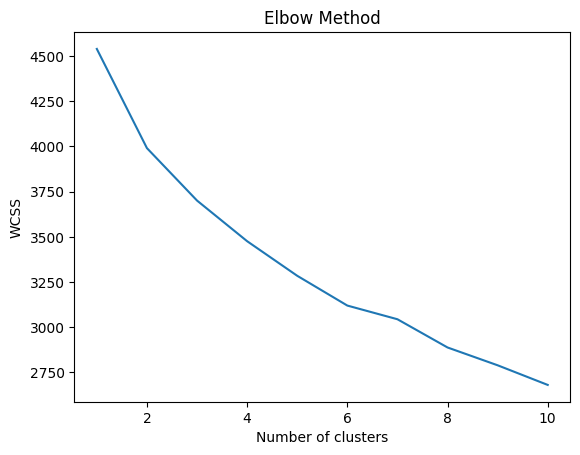

In [50]:
#optimize number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(trainDataFrame_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(trainDataFrame_scaled)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

ValueError: Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.